In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [14]:
import pandas as pd

pd.set_option('display.max_rows', 100)

In [15]:
import numpy as np

In [16]:
from lint_analysis.bin_counts import cache

In [17]:
tokens = cache.token_pos_counts(10000)

In [18]:
data = []

for i, ((token, pos), count) in enumerate(tokens.items()):
    
    series = cache.token_series(token, pos=pos)
    exp_var = series.sum() * (1/100) * (1 - 1/100)
    
    data.append((token, pos, count, series.var(), exp_var))
    
    if i % 1000 == 0: print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [19]:
df = pd.DataFrame(data, columns=('token', 'pos', 'count', 'var', 'exp'))

In [20]:
import math

df['score'] = df.index.map(
    lambda t: df.loc[t]['var'] / df.loc[t]['exp']
)

In [ ]:
for token in list(df.sort_values('score', ascending=False).head(1000)['token']):
    print(token)

In [36]:
def plot_token(token, pos=None, title=None, w=5, h=5):
    
    plt.figure(figsize=(w, h))
    
    series = cache.token_series(token, pos=pos)
    plt.plot(series)
    
    title = f'{token} ({pos})' if pos else token
    plt.title(title)
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    plt.show()

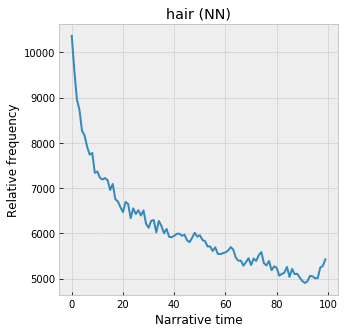

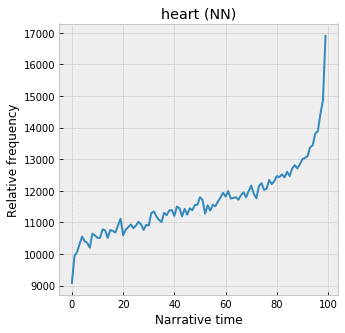

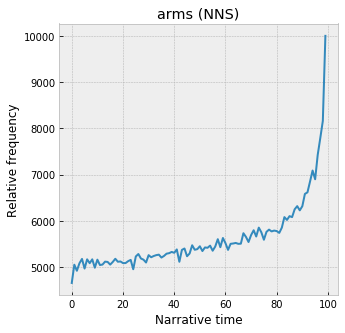

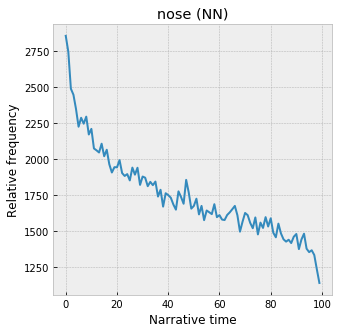

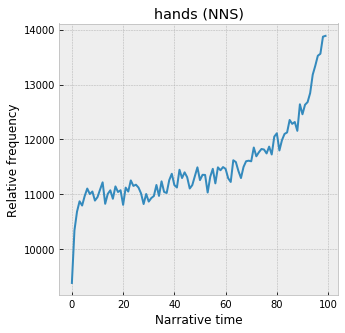

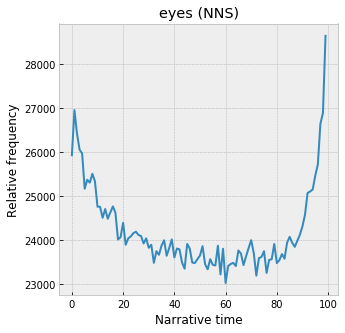

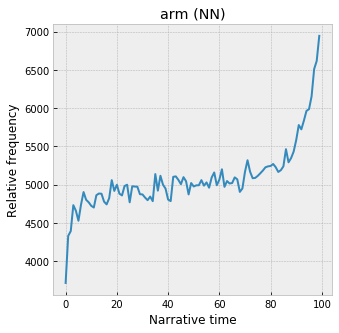

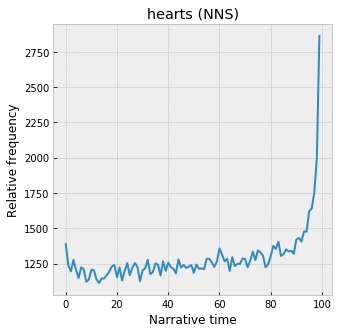

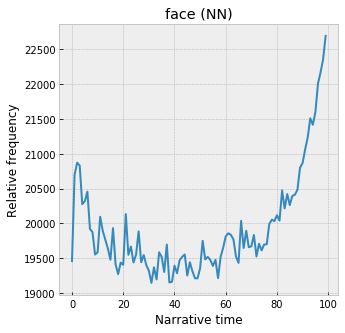

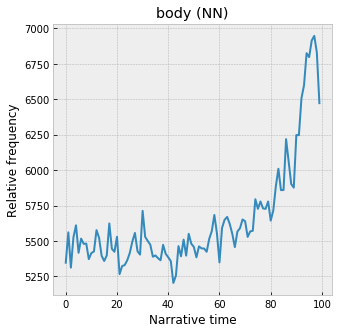

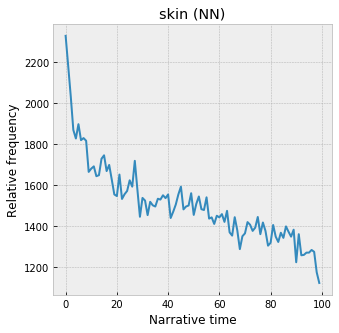

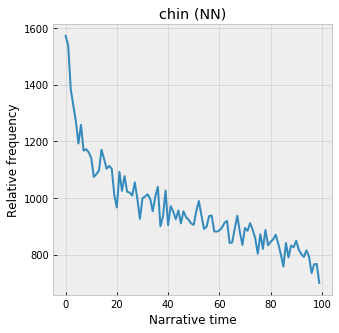

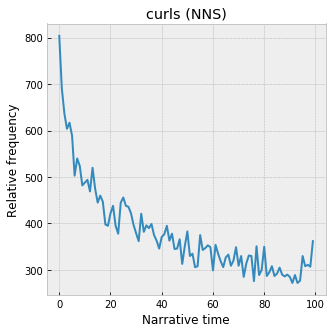

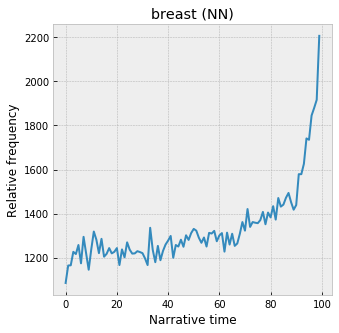

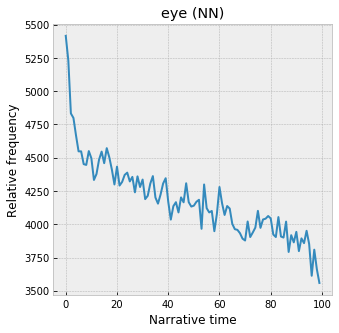

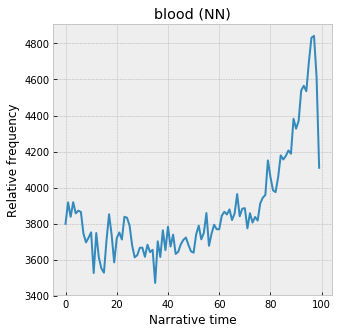

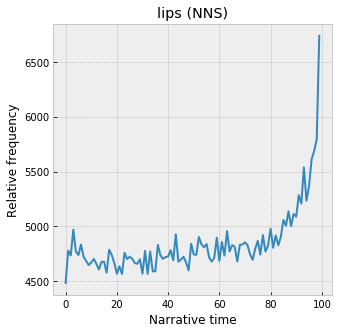

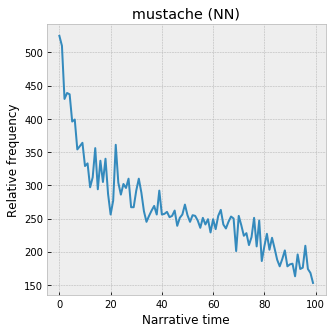

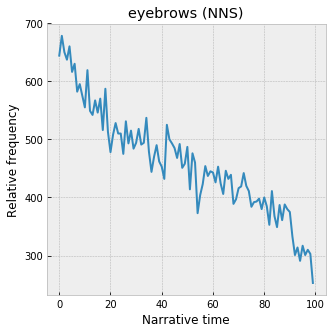

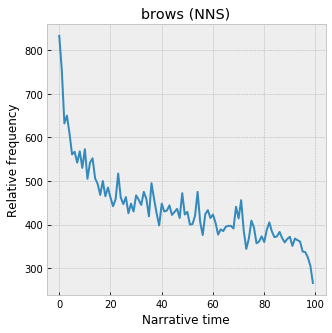

In [56]:
plot_token('hair', 'NN')
plot_token('heart', 'NN')
plot_token('arms', 'NNS')
# plot_token('back', 'NN')
plot_token('nose', 'NN')
plot_token('hands', 'NNS')
plot_token('eyes', 'NNS')
plot_token('arm', 'NN')
plot_token('hearts', 'NNS')
plot_token('face', 'NN')
plot_token('body', 'NN')
plot_token('skin', 'NN')
plot_token('chin', 'NN')
plot_token('curls', 'NNS')
plot_token('breast', 'NN')
plot_token('eye', 'NN')
plot_token('blood', 'NN')
plot_token('lips', 'NNS')
plot_token('mustache', 'NN')
plot_token('eyebrows', 'NNS')
plot_token('brows', 'NNS')